In [ ]:
pip install tensorflow==1.15

     |████████████████████████████████| 412.3MB 40kB/s 
     |████████████████████████████████| 3.8MB 45.2MB/s 
     |████████████████████████████████| 51kB 7.1MB/s 
     |████████████████████████████████| 512kB 40.8MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp37-none-any.whl size=7540 sha256=42cc6ceefa7704daeebbbbd1c1e3e2fa757556660694a983797dfa98ed1f6f3e
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.12.1 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorboard 2.4.1
    Uninstalling tensorboard-2.4.1:
      Successfully uninstalled tensorboard-2.4.1
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully 

In [ ]:
pip install dask[bag]

In [ ]:
import re
import numpy as np

def cleanData(strg):
    line = re.sub("[^a-zA-Z]",' ',strg)
    line = re.sub('  ',' ',line)
    result=str.lower(line)
    return result

def getSentenceLength(strg):
    return len(strg.split())

def add_placeholders(strg, limit):
    line = strg.split()
    length = len(line)
    if length<limit:
        line = line + ['nowordplaceholder']*(limit-length)
    result = ' '.join(line)
    return result

def create_sentence_vectors(strg, dic):
    line = strg.split()
    result = np.array([*map(lambda x: dic[x], line)])
    return result

In [ ]:
# Dataframe
import pandas as pd

# Array
import numpy as np

# Decompress the file
import gzip

# Visualizations
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.colors as colors
%matplotlib inline


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from nltk import FreqDist
import operator
import numpy as np

from sklearn.model_selection import train_test_split

import pickle
import tensorflow as tf

# Datetime
from datetime import datetime

## Warnings
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

# Large dataset
import dask.bag as db
from itertools import islice
import json


from sklearn.model_selection import train_test_split

import pickle

In [ ]:

review_df = pd.read_json('/content/Bookssample_5.json', orient='records', lines=True)
print(review_df)


                   reviewerID        asin  ... unixReviewTime   reviewTime
0       A10000012B7CGYKOMPQ4L  000100039X  ...     1355616000  12 16, 2012
1              A2S166WSCFIFP5  000100039X  ...     1071100800  12 11, 2003
2              A1BM81XB4QHOA3  000100039X  ...     1390003200  01 18, 2014
3              A1MOSTXNIO5MPJ  000100039X  ...     1317081600  09 27, 2011
4              A2XQ5LZHTD4AFT  000100039X  ...     1033948800   10 7, 2002
...                       ...         ...  ...            ...          ...
199995         A15P0E7IYRBXAX  0060975776  ...     1208390400  04 17, 2008
199996         A1WX7UUXN4WNL0  0060975776  ...     1111276800  03 20, 2005
199997         A2R6LKLYSJIQH8  0060975776  ...     1358380800  01 17, 2013
199998         A3QYDL5CDNYN66  0060975776  ...     1285372800  09 25, 2010
199999          AI0A3WN9QZVSL  0060975776  ...      956620800  04 25, 2000

[200000 rows x 9 columns]


# New Section

In [ ]:
del review_df['reviewerName']
del review_df['helpful']
del review_df['unixReviewTime']
del review_df['reviewTime']
review_df

,reviewerID,asin,reviewText,overall,summary
0,A10000012B7CGYKOMPQ4L,000100039X,Spiritually and mentally inspiring! A book tha...,5,Wonderful!
1,A2S166WSCFIFP5,000100039X,This is one my must have books. It is a master...,5,close to god
2,A1BM81XB4QHOA3,000100039X,This book provides a reflection that you can a...,5,Must Read for Life Afficianados
3,A1MOSTXNIO5MPJ,000100039X,I first read THE PROPHET in college back in th...,5,Timeless for every good and bad time in your l...
4,A2XQ5LZHTD4AFT,000100039X,A timeless classic. It is a very demanding an...,5,A Modern Rumi
...,...,...,...,...,...
199995,A15P0E7IYRBXAX,0060975776,"I tried to like this collection, and there wer...",2,Just Not Sure
199996,A1WX7UUXN4WNL0,0060975776,"I love this book. The ending lines about ""I n...",5,brilliant and beautiful
199997,A2R6LKLYSJIQH8,0060975776,I don't think that Jesus' Son should be put wi...,4,Left me wanting more
199998,A3QYDL5CDNYN66,0060975776,Stories involving drug addiction. Johnson's gr...,5,Spectacularly accurate and beautifully written


In [ ]:

def parse(path):
    g = open('/content/metaBooksslice.json')
    for l in g:
        yield eval(l)

def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')

 
dfmeta = getDF('/content/metaBooksslice.json')
dfmeta

,category,tech1,description,fit,title,also_buy,image,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,asin
0,[],,[It is a biology book with God&apos;s perspect...,,Biology Gods Living Creation Third Edition 10 ...,"[0669009075, B000K2P5SA, B00MD4G2N0, B000ASIPT...",[],,Keith Graham,[],"1,349,781 in Books (","[0019777701, B000AUCX7I, B000K2P5SA, B001CK63X...",Books,,,$39.94,0000092878
1,"[Books, New, Used & Rental Textbooks, Medicine...",,[],,Mksap 16 Audio Companion: Medical Knowledge Se...,[],[],,Acp,[],"1,702,625 in Books (","[B01MUCYEV7, B01KUGTY6O]",Books,,,,000047715X
2,"[Books, Arts & Photography, Music]",,"[Discography of American Punk, Hardcore, and P...",,"Flex! Discography of North American Punk, Hard...",[],[],,Burkhard Jarisch,[],"6,291,012 in Books (",[],Books,,,$199.99,0000004545
3,"[Books, Arts & Photography, Music]",,[This is a collection of classic gospel hymns ...,,Heavenly Highway Hymns: Shaped-Note Hymnal,[],[],,Stamps/Baxter,[],"2,384,057 in Books (","[0006180116, 0996092730, B000QFOGY0, B06WWKNDL...",Books,,,,0000013765
4,[],,[],,Georgina Goodman Nelson Womens Size 8.5 Purple...,[],[],,,[],"11,735,726 in Books (",[],Books,,,$164.10,0000000116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,"[Books, Cookbooks, Food &amp; Wine, Regional &...",,"[, , , , , ]",,Ciao Italia in Tuscany: Traditional Recipes fr...,"[0312571216, 0312303297, 0688103170, 031236292...",[],,Visit Amazon's Mary Ann Esposito Page,[],"1,059,904 in Books (","[0312571216, 1942155174, 0688103170, 031237769...",Books,,,$40.49,0312321740
199996,"[Books, Mystery, Thriller &amp; Suspense, Thri...",,[The author's death three years ago has not pr...,,The Tristan Betrayal,"[080371274X, 0312316739, 0312276885, 055310667...",[],,Visit Amazon's Robert Ludlum Page,[],"2,128,098 in Books (","[1250093287, 0312990693, 0312990707, 080417957...",Books,,,$2.70,0312316690
199997,"[Books, Self-Help, Death &amp; Grief]",,[This unflinching and emotionally powerful por...,,Your Father's Voice: Letters for Emmy About Li...,"[193678274X, 159755037X, 0060099089]",[],,Visit Amazon's Lyz Glick Page,[],"2,273,246 in Books (","[159755037X, 0842374183, 1555837808]",Books,,,$2.40,0312319215
199998,"[Books, New, Used &amp; Rental Textbooks, Huma...",,[],,The Geography of Warfare,[],[],,Visit Amazon's Patrick Michael O'Sullivan Page,[],"6,040,748 in Books (",[],Books,,,,0312321848


In [ ]:
dfmeta.shape

(200000, 17)

In [ ]:
s = pd.merge(review_df, dfmeta, on=['asin'], how='inner')
print(s)

                   reviewerID        asin  ... date   price
0       A10000012B7CGYKOMPQ4L  000100039X  ...             
1              A2S166WSCFIFP5  000100039X  ...             
2              A1BM81XB4QHOA3  000100039X  ...             
3              A1MOSTXNIO5MPJ  000100039X  ...             
4              A2XQ5LZHTD4AFT  000100039X  ...             
...                       ...         ...  ...  ...     ...
117967         A15P0E7IYRBXAX  0060975776  ...       $13.80
117968         A1WX7UUXN4WNL0  0060975776  ...       $13.80
117969         A2R6LKLYSJIQH8  0060975776  ...       $13.80
117970         A3QYDL5CDNYN66  0060975776  ...       $13.80
117971          AI0A3WN9QZVSL  0060975776  ...       $13.80

[117972 rows x 21 columns]


In [ ]:
dfmeta['newcat'] = dfmeta['category'].str[1:]



In [ ]:
dfmeta

,category,tech1,description,fit,title,also_buy,image,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,asin,newcat
0,[],,[It is a biology book with God&apos;s perspect...,,Biology Gods Living Creation Third Edition 10 ...,"[0669009075, B000K2P5SA, B00MD4G2N0, B000ASIPT...",[],,Keith Graham,[],"1,349,781 in Books (","[0019777701, B000AUCX7I, B000K2P5SA, B001CK63X...",Books,,,$39.94,0000092878,[]
1,"[Books, New, Used & Rental Textbooks, Medicine...",,[],,Mksap 16 Audio Companion: Medical Knowledge Se...,[],[],,Acp,[],"1,702,625 in Books (","[B01MUCYEV7, B01KUGTY6O]",Books,,,,000047715X,"[New, Used & Rental Textbooks, Medicine & Heal..."
2,"[Books, Arts & Photography, Music]",,"[Discography of American Punk, Hardcore, and P...",,"Flex! Discography of North American Punk, Hard...",[],[],,Burkhard Jarisch,[],"6,291,012 in Books (",[],Books,,,$199.99,0000004545,"[Arts & Photography, Music]"
3,"[Books, Arts & Photography, Music]",,[This is a collection of classic gospel hymns ...,,Heavenly Highway Hymns: Shaped-Note Hymnal,[],[],,Stamps/Baxter,[],"2,384,057 in Books (","[0006180116, 0996092730, B000QFOGY0, B06WWKNDL...",Books,,,,0000013765,"[Arts & Photography, Music]"
4,[],,[],,Georgina Goodman Nelson Womens Size 8.5 Purple...,[],[],,,[],"11,735,726 in Books (",[],Books,,,$164.10,0000000116,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,"[Books, Cookbooks, Food &amp; Wine, Regional &...",,"[, , , , , ]",,Ciao Italia in Tuscany: Traditional Recipes fr...,"[0312571216, 0312303297, 0688103170, 031236292...",[],,Visit Amazon's Mary Ann Esposito Page,[],"1,059,904 in Books (","[0312571216, 1942155174, 0688103170, 031237769...",Books,,,$40.49,0312321740,"[Cookbooks, Food &amp; Wine, Regional &amp; In..."
199996,"[Books, Mystery, Thriller &amp; Suspense, Thri...",,[The author's death three years ago has not pr...,,The Tristan Betrayal,"[080371274X, 0312316739, 0312276885, 055310667...",[],,Visit Amazon's Robert Ludlum Page,[],"2,128,098 in Books (","[1250093287, 0312990693, 0312990707, 080417957...",Books,,,$2.70,0312316690,"[Mystery, Thriller &amp; Suspense, Thrillers &..."
199997,"[Books, Self-Help, Death &amp; Grief]",,[This unflinching and emotionally powerful por...,,Your Father's Voice: Letters for Emmy About Li...,"[193678274X, 159755037X, 0060099089]",[],,Visit Amazon's Lyz Glick Page,[],"2,273,246 in Books (","[159755037X, 0842374183, 1555837808]",Books,,,$2.40,0312319215,"[Self-Help, Death &amp; Grief]"
199998,"[Books, New, Used &amp; Rental Textbooks, Huma...",,[],,The Geography of Warfare,[],[],,Visit Amazon's Patrick Michael O'Sullivan Page,[],"6,040,748 in Books (",[],Books,,,,0312321848,"[New, Used &amp; Rental Textbooks, Humanities]"


In [ ]:
dfmeta.columns

Index(['category', 'tech1', 'description', 'fit', 'title', 'also_buy', 'image',
       'tech2', 'brand', 'feature', 'rank', 'also_view', 'main_cat',
       'similar_item', 'date', 'price', 'asin', 'newcat'],
      dtype='object')

In [ ]:
s = pd.merge(review_df, dfmeta, on=['asin'], how='inner')
s = s.rename(columns = {'title': 'Title'}, inplace = False)
s 

,reviewerID,asin,reviewText,overall,summary,category,tech1,description,fit,Title,also_buy,image,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,newcat
0,A10000012B7CGYKOMPQ4L,000100039X,Spiritually and mentally inspiring! A book tha...,5,Wonderful!,"[Books, Literature & Fiction, Poetry]",,[Kahlil Gibran was among the most important Ar...,,The Prophet,"[0486419118, 1502521415, 1786072815, 006231500...",[],,Visit Amazon's Kahlil Gibran Page,[],"1,810,945 in Books (","[1781394016, 817234354X, 0307267075, 812911906...",Books,,,,"[Literature & Fiction, Poetry]"
1,A2S166WSCFIFP5,000100039X,This is one my must have books. It is a master...,5,close to god,"[Books, Literature & Fiction, Poetry]",,[Kahlil Gibran was among the most important Ar...,,The Prophet,"[0486419118, 1502521415, 1786072815, 006231500...",[],,Visit Amazon's Kahlil Gibran Page,[],"1,810,945 in Books (","[1781394016, 817234354X, 0307267075, 812911906...",Books,,,,"[Literature & Fiction, Poetry]"
2,A1BM81XB4QHOA3,000100039X,This book provides a reflection that you can a...,5,Must Read for Life Afficianados,"[Books, Literature & Fiction, Poetry]",,[Kahlil Gibran was among the most important Ar...,,The Prophet,"[0486419118, 1502521415, 1786072815, 006231500...",[],,Visit Amazon's Kahlil Gibran Page,[],"1,810,945 in Books (","[1781394016, 817234354X, 0307267075, 812911906...",Books,,,,"[Literature & Fiction, Poetry]"
3,A1MOSTXNIO5MPJ,000100039X,I first read THE PROPHET in college back in th...,5,Timeless for every good and bad time in your l...,"[Books, Literature & Fiction, Poetry]",,[Kahlil Gibran was among the most important Ar...,,The Prophet,"[0486419118, 1502521415, 1786072815, 006231500...",[],,Visit Amazon's Kahlil Gibran Page,[],"1,810,945 in Books (","[1781394016, 817234354X, 0307267075, 812911906...",Books,,,,"[Literature & Fiction, Poetry]"
4,A2XQ5LZHTD4AFT,000100039X,A timeless classic. It is a very demanding an...,5,A Modern Rumi,"[Books, Literature & Fiction, Poetry]",,[Kahlil Gibran was among the most important Ar...,,The Prophet,"[0486419118, 1502521415, 1786072815, 006231500...",[],,Visit Amazon's Kahlil Gibran Page,[],"1,810,945 in Books (","[1781394016, 817234354X, 0307267075, 812911906...",Books,,,,"[Literature & Fiction, Poetry]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117967,A15P0E7IYRBXAX,0060975776,"I tried to like this collection, and there wer...",2,Just Not Sure,"[Books, Literature &amp; Fiction, Short Storie...",,[The unnamed narrator in <i>Jesus' Son</i> liv...,,Jesus' Son: Stories,"[0812988639, 0374531099, 081121687X, 031242774...",[],,Visit Amazon's Denis Johnson Page,[],"1,470,929 in Books (","[0812988639, 0312424094, 1250303540, 031242774...",Books,,,$13.80,"[Literature &amp; Fiction, Short Stories &amp;..."
117968,A1WX7UUXN4WNL0,0060975776,"I love this book. The ending lines about ""I n...",5,brilliant and beautiful,"[Books, Literature &amp; Fiction, Short Storie...",,[The unnamed narrator in <i>Jesus' Son</i> liv...,,Jesus' Son: Stories,"[0812988639, 0374531099, 081121687X, 031242774...",[],,Visit Amazon's Denis Johnson Page,[],"1,470,929 in Books (","[0812988639, 0312424094, 1250303540, 031242774...",Books,,,$13.80,"[Literature &amp; Fiction, Short Stories &amp;..."
117969,A2R6LKLYSJIQH8,0060975776,I don't think that Jesus' Son should be put wi...,4,Left me wanting more,"[Books, Literature &amp; Fiction, Short Storie...",,[The unnamed narrator in <i>Jesus' Son</i> liv...,,Jesus' Son: Stories,"[0812988639, 0374531099, 081121687X, 031242774...",[],,Visit Amazon's Denis Johnson Page,[],"1,470,929 in Books (","[0812988639, 0312424094, 1250303540, 031242774...",Books,,,$13.80,"[Literature &amp; Fiction, Short Stories &amp;..."
117970,A3QYDL5CDNYN66,0060975776,Stories involving drug addiction. Johnson's gr...,5,Spectacularly accurate and beautifully written,"[Books, Literature &amp; Fiction, Short Storie...",,[The unnamed narrator in <i>Jesus' Son</i> liv...,,Jesus' Son

In [ ]:
with open('/content/work_Data.json') as f:
    work_df = pd.DataFrame([json.loads(l) for l in f.readlines()])


FileNotFoundError: ignored

In [ ]:
work_df = work_df.rename(columns = {'title': 'Title'}, inplace = False)
work_df

,Title,created,covers,last_modified,latest_revision,key,authors,type,revision,subjects,subject_places,subject_times,description,subtitle,subject_people,links,first_publish_date,lc_classifications,dewey_number,cover_edition,first_sentence,excerpts
0,Les Tests de recrutement,"{'type': '/type/datetime', 'value': '2009-12-1...",[3140904],"{'type': '/type/datetime', 'value': '2010-04-2...",3,/works/OL10000481W,"[{'type': '/type/author_role', 'author': {'key...",{'key': '/type/work'},3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,L'Opéra mode d'emploi,"{'type': '/type/datetime', 'value': '2009-12-1...",[3141188],"{'type': '/type/datetime', 'value': '2020-12-0...",4,/works/OL10000635W,"[{'type': {'key': '/type/author_role'}, 'autho...",{'key': '/type/work'},4,"[Opera, Handbooks, manuals]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Les voisins font un cirque le dimanche,"{'type': '/type/datetime', 'value': '2009-12-1...",[3141581],"{'type': '/type/datetime', 'value': '2019-07-1...",4,/works/OL10000808W,"[{'type': {'key': '/type/author_role'}, 'autho...",{'key': '/type/work'},4,"[Neighbors, Children's stories, French, Circus...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Parents d'eleve au bord de la crise de nerf,"{'type': '/type/datetime', 'value': '2009-12-1...",[3143923],"{'type': '/type/datetime', 'value': '2010-04-2...",3,/works/OL10001780W,"[{'type': '/type/author_role', 'author': {'key...",{'key': '/type/work'},3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Paul Landowski,"{'type': '/type/datetime', 'value': '2009-12-1...",NaN,"{'type': '/type/datetime', 'value': '2020-12-2...",2,/works/OL10002376W,"[{'type': {'key': '/type/author_role'}, 'autho...",{'key': '/type/work'},2,[Catalogues raisonnés],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Mrs. Greet's Story of the (golden owl),"{'type': '/type/datetime', 'value': '2009-12-1...",NaN,"{'type': '/type/datetime', 'value': '2010-01-2...",2,/works/OL13238047W,"[{'type': '/type/author_role', 'author': {'key...",{'key': '/type/work'},2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1892,NaN,NaN,NaN,NaN,NaN
99996,A study of starch digesting organisms in the b...,"{'type': '/type/datetime', 'value': '2009-12-1...",NaN,"{'type': '/type/datetime', 'value': '2010-01-2...",2,/works/OL13238072W,"[{'type': '/type/author_role', 'author': {'key...",{'key': '/type/work'},2,"[Bacteriology, Digestive organs, Microbiology,...",NaN,NaN,NaN,NaN,NaN,NaN,1953,NaN,NaN,NaN,NaN,NaN
99997,İntibah,"{'type': '/type/datetime', 'value': '2009-12-1...",NaN,"{'type': '/type/datetime', 'value': '2010-01-2...",2,/works/OL13238382W,"[{'type': '/type/author_role', 'author': {'key...",{'key': '/type/work'},2,"[Politics and government, Druzes, History]","[Turkey, Syria]","[1878-1909, 1895-1945]",NaN,NaN,"[Zühdı̂, İsmail]",NaN,1995,[DR568.8.Z83 A3 1995],NaN,NaN,NaN,NaN
99998,"Guide to Lachish, Tell ed Duweir","{'type': '/type/datetime', 'value': '2009-12-0...",NaN,"{'type': '/type/datetime', 'value': '2010-01-2...",2,/works/OL1323856W,"[{'type': '/type/author_role', 'author': {'key...",{'key': '/type/work'},2,NaN,[Lachish (Israel)],NaN,NaN,NaN,NaN,NaN,1943,[DS110.L3 H3],NaN,NaN,NaN,NaN


In [ ]:
work_df['created'] = work_df['created'].astype(str).str[39:63]
work_df['key'] = work_df['key'].astype(str).str[7:]
work_df

,Title,created,covers,last_modified,latest_revision,key,authors,type,revision,subjects,subject_places,subject_times,description,subtitle,subject_people,links,first_publish_date,lc_classifications,dewey_number,cover_edition,first_sentence,excerpts
0,Les Tests de recrutement,09-12-11T01:57:19.964652,[3140904],"{'type': '/type/datetime', 'value': '2010-04-2...",3,OL10000481W,"[{'type': '/type/author_role', 'author': {'key...",{'key': '/type/work'},3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,L'Opéra mode d'emploi,09-12-11T01:57:19.964652,[3141188],"{'type': '/type/datetime', 'value': '2020-12-0...",4,OL10000635W,"[{'type': {'key': '/type/author_role'}, 'autho...",{'key': '/type/work'},4,"[Opera, Handbooks, manuals]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Les voisins font un cirque le dimanche,09-12-11T01:57:19.964652,[3141581],"{'type': '/type/datetime', 'value': '2019-07-1...",4,OL10000808W,"[{'type': {'key': '/type/author_role'}, 'autho...",{'key': '/type/work'},4,"[Neighbors, Children's stories, French, Circus...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Parents d'eleve au bord de la crise de nerf,09-12-11T01:57:29.804644,[3143923],"{'type': '/type/datetime', 'value': '2010-04-2...",3,OL10001780W,"[{'type': '/type/author_role', 'author': {'key...",{'key': '/type/work'},3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Paul Landowski,09-12-11T01:57:38.254267,NaN,"{'type': '/type/datetime', 'value': '2020-12-2...",2,OL10002376W,"[{'type': {'key': '/type/author_role'}, 'autho...",{'key': '/type/work'},2,[Catalogues raisonnés],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Mrs. Greet's Story of the (golden owl),09-12-11T08:58:44.378254,NaN,"{'type': '/type/datetime', 'value': '2010-01-2...",2,OL13238047W,"[{'type': '/type/author_role', 'author': {'key...",{'key': '/type/work'},2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1892,NaN,NaN,NaN,NaN,NaN
99996,A study of starch digesting organisms in the b...,09-12-11T08:58:44.378254,NaN,"{'type': '/type/datetime', 'value': '2010-01-2...",2,OL13238072W,"[{'type': '/type/author_role', 'author': {'key...",{'key': '/type/work'},2,"[Bacteriology, Digestive organs, Microbiology,...",NaN,NaN,NaN,NaN,NaN,NaN,1953,NaN,NaN,NaN,NaN,NaN
99997,İntibah,09-12-11T08:58:44.378254,NaN,"{'type': '/type/datetime', 'value': '2010-01-2...",2,OL13238382W,"[{'type': '/type/author_role', 'author': {'key...",{'key': '/type/work'},2,"[Politics and government, Druzes, History]","[Turkey, Syria]","[1878-1909, 1895-1945]",NaN,NaN,"[Zühdı̂, İsmail]",NaN,1995,[DR568.8.Z83 A3 1995],NaN,NaN,NaN,NaN
99998,"Guide to Lachish, Tell ed Duweir",09-12-09T21:05:35.467290,NaN,"{'type': '/type/datetime', 'value': '2010-01-2...",2,OL1323856W,"[{'type': '/type/author_role', 'author': {'key...",{'key': '/type/work'},2,NaN,[Lachish (Israel)],NaN,NaN,NaN,NaN,NaN,1943,[DS110.L3 H3],NaN,NaN,NaN,NaN


In [ ]:
s1 = pd.merge(s, work_df, on=['Title'], how='inner')
s1[['Title','authors','newcat','created']]

NameError: ignored

In [ ]:
s.columns

Index(['reviewerID', 'asin', 'reviewText', 'overall', 'summary', 'category',
       'tech1', 'description', 'fit', 'Title', 'also_buy', 'image', 'tech2',
       'brand', 'feature', 'rank', 'also_view', 'main_cat', 'similar_item',
       'date', 'price', 'newcat'],
      dtype='object')

In [ ]:
#author condition, merge of author

In [ ]:
dfmeta.columns

Index(['category', 'tech1', 'description', 'fit', 'title', 'also_buy', 'image',
       'tech2', 'brand', 'feature', 'rank', 'also_view', 'main_cat',
       'similar_item', 'date', 'price', 'asin', 'newcat'],
      dtype='object')

In [ ]:
dfmeta

,category,tech1,description,fit,title,also_buy,image,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,asin,newcat
0,[],,[It is a biology book with God&apos;s perspect...,,Biology Gods Living Creation Third Edition 10 ...,"[0669009075, B000K2P5SA, B00MD4G2N0, B000ASIPT...",[],,Keith Graham,[],"1,349,781 in Books (","[0019777701, B000AUCX7I, B000K2P5SA, B001CK63X...",Books,,,$39.94,0000092878,[]
1,"[Books, New, Used & Rental Textbooks, Medicine...",,[],,Mksap 16 Audio Companion: Medical Knowledge Se...,[],[],,Acp,[],"1,702,625 in Books (","[B01MUCYEV7, B01KUGTY6O]",Books,,,,000047715X,"[New, Used & Rental Textbooks, Medicine & Heal..."
2,"[Books, Arts & Photography, Music]",,"[Discography of American Punk, Hardcore, and P...",,"Flex! Discography of North American Punk, Hard...",[],[],,Burkhard Jarisch,[],"6,291,012 in Books (",[],Books,,,$199.99,0000004545,"[Arts & Photography, Music]"
3,"[Books, Arts & Photography, Music]",,[This is a collection of classic gospel hymns ...,,Heavenly Highway Hymns: Shaped-Note Hymnal,[],[],,Stamps/Baxter,[],"2,384,057 in Books (","[0006180116, 0996092730, B000QFOGY0, B06WWKNDL...",Books,,,,0000013765,"[Arts & Photography, Music]"
4,[],,[],,Georgina Goodman Nelson Womens Size 8.5 Purple...,[],[],,,[],"11,735,726 in Books (",[],Books,,,$164.10,0000000116,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,"[Books, Cookbooks, Food &amp; Wine, Regional &...",,"[, , , , , ]",,Ciao Italia in Tuscany: Traditional Recipes fr...,"[0312571216, 0312303297, 0688103170, 031236292...",[],,Visit Amazon's Mary Ann Esposito Page,[],"1,059,904 in Books (","[0312571216, 1942155174, 0688103170, 031237769...",Books,,,$40.49,0312321740,"[Cookbooks, Food &amp; Wine, Regional &amp; In..."
199996,"[Books, Mystery, Thriller &amp; Suspense, Thri...",,[The author's death three years ago has not pr...,,The Tristan Betrayal,"[080371274X, 0312316739, 0312276885, 055310667...",[],,Visit Amazon's Robert Ludlum Page,[],"2,128,098 in Books (","[1250093287, 0312990693, 0312990707, 080417957...",Books,,,$2.70,0312316690,"[Mystery, Thriller &amp; Suspense, Thrillers &..."
199997,"[Books, Self-Help, Death &amp; Grief]",,[This unflinching and emotionally powerful por...,,Your Father's Voice: Letters for Emmy About Li...,"[193678274X, 159755037X, 0060099089]",[],,Visit Amazon's Lyz Glick Page,[],"2,273,246 in Books (","[159755037X, 0842374183, 1555837808]",Books,,,$2.40,0312319215,"[Self-Help, Death &amp; Grief]"
199998,"[Books, New, Used &amp; Rental Textbooks, Huma...",,[],,The Geography of Warfare,[],[],,Visit Amazon's Patrick Michael O'Sullivan Page,[],"6,040,748 in Books (",[],Books,,,,0312321848,"[New, Used &amp; Rental Textbooks, Humanities]"


In [ ]:
s

,reviewerID,asin,reviewText,overall,summary,category,tech1,description,fit,Title,also_buy,image,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,newcat
0,A10000012B7CGYKOMPQ4L,000100039X,Spiritually and mentally inspiring! A book tha...,5,Wonderful!,"[Books, Literature & Fiction, Poetry]",,[Kahlil Gibran was among the most important Ar...,,The Prophet,"[0486419118, 1502521415, 1786072815, 006231500...",[],,Visit Amazon's Kahlil Gibran Page,[],"1,810,945 in Books (","[1781394016, 817234354X, 0307267075, 812911906...",Books,,,,"[Literature & Fiction, Poetry]"
1,A2S166WSCFIFP5,000100039X,This is one my must have books. It is a master...,5,close to god,"[Books, Literature & Fiction, Poetry]",,[Kahlil Gibran was among the most important Ar...,,The Prophet,"[0486419118, 1502521415, 1786072815, 006231500...",[],,Visit Amazon's Kahlil Gibran Page,[],"1,810,945 in Books (","[1781394016, 817234354X, 0307267075, 812911906...",Books,,,,"[Literature & Fiction, Poetry]"
2,A1BM81XB4QHOA3,000100039X,This book provides a reflection that you can a...,5,Must Read for Life Afficianados,"[Books, Literature & Fiction, Poetry]",,[Kahlil Gibran was among the most important Ar...,,The Prophet,"[0486419118, 1502521415, 1786072815, 006231500...",[],,Visit Amazon's Kahlil Gibran Page,[],"1,810,945 in Books (","[1781394016, 817234354X, 0307267075, 812911906...",Books,,,,"[Literature & Fiction, Poetry]"
3,A1MOSTXNIO5MPJ,000100039X,I first read THE PROPHET in college back in th...,5,Timeless for every good and bad time in your l...,"[Books, Literature & Fiction, Poetry]",,[Kahlil Gibran was among the most important Ar...,,The Prophet,"[0486419118, 1502521415, 1786072815, 006231500...",[],,Visit Amazon's Kahlil Gibran Page,[],"1,810,945 in Books (","[1781394016, 817234354X, 0307267075, 812911906...",Books,,,,"[Literature & Fiction, Poetry]"
4,A2XQ5LZHTD4AFT,000100039X,A timeless classic. It is a very demanding an...,5,A Modern Rumi,"[Books, Literature & Fiction, Poetry]",,[Kahlil Gibran was among the most important Ar...,,The Prophet,"[0486419118, 1502521415, 1786072815, 006231500...",[],,Visit Amazon's Kahlil Gibran Page,[],"1,810,945 in Books (","[1781394016, 817234354X, 0307267075, 812911906...",Books,,,,"[Literature & Fiction, Poetry]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117967,A15P0E7IYRBXAX,0060975776,"I tried to like this collection, and there wer...",2,Just Not Sure,"[Books, Literature &amp; Fiction, Short Storie...",,[The unnamed narrator in <i>Jesus' Son</i> liv...,,Jesus' Son: Stories,"[0812988639, 0374531099, 081121687X, 031242774...",[],,Visit Amazon's Denis Johnson Page,[],"1,470,929 in Books (","[0812988639, 0312424094, 1250303540, 031242774...",Books,,,$13.80,"[Literature &amp; Fiction, Short Stories &amp;..."
117968,A1WX7UUXN4WNL0,0060975776,"I love this book. The ending lines about ""I n...",5,brilliant and beautiful,"[Books, Literature &amp; Fiction, Short Storie...",,[The unnamed narrator in <i>Jesus' Son</i> liv...,,Jesus' Son: Stories,"[0812988639, 0374531099, 081121687X, 031242774...",[],,Visit Amazon's Denis Johnson Page,[],"1,470,929 in Books (","[0812988639, 0312424094, 1250303540, 031242774...",Books,,,$13.80,"[Literature &amp; Fiction, Short Stories &amp;..."
117969,A2R6LKLYSJIQH8,0060975776,I don't think that Jesus' Son should be put wi...,4,Left me wanting more,"[Books, Literature &amp; Fiction, Short Storie...",,[The unnamed narrator in <i>Jesus' Son</i> liv...,,Jesus' Son: Stories,"[0812988639, 0374531099, 081121687X, 031242774...",[],,Visit Amazon's Denis Johnson Page,[],"1,470,929 in Books (","[0812988639, 0312424094, 1250303540, 031242774...",Books,,,$13.80,"[Literature &amp; Fiction, Short Stories &amp;..."
117970,A3QYDL5CDNYN66,0060975776,Stories involving drug addiction. Johnson's gr...,5,Spectacularly accurate and beautifully written,"[Books, Literature &amp; Fiction, Short Storie...",,[The unnamed narrator in <i>Jesus' Son</i> liv...,,Jesus' Son

In [ ]:
dfmeta
selected_columns = dfmeta[["category","description","title","rank","newcat",]]
#Index into desired columns to copy

s2 = selected_columns.copy()
print(s2)

                                                 category  ...                                             newcat
0                                                      []  ...                                                 []
1       [Books, New, Used & Rental Textbooks, Medicine...  ...  [New, Used & Rental Textbooks, Medicine & Heal...
2                      [Books, Arts & Photography, Music]  ...                        [Arts & Photography, Music]
3                      [Books, Arts & Photography, Music]  ...                        [Arts & Photography, Music]
4                                                      []  ...                                                 []
...                                                   ...  ...                                                ...
199995  [Books, Cookbooks, Food &amp; Wine, Regional &...  ...  [Cookbooks, Food &amp; Wine, Regional &amp; In...
199996  [Books, Mystery, Thriller &amp; Suspense, Thri...  ...  [Mystery, Thriller &amp;

In [ ]:
smodif = pd.DataFrame(columns=['reviewerID','asin','Title','ReviewText','Summary','Rating','cat1','cat2'])
for i in range(0,len(s.index)):
        try:
            smodif=smodif.append({'reviewerID':s.get('reviewerID')[i]
                          ,'asin':s.get('asin')[i]
                         ,'Title':s.get('Title')[i]
                          ,'cat1':s.get('newcat')[i][0]
                         ,'ReviewText':s.get('reviewText')[i]
                         ,'Summary':s.get('summary')[i]
                         ,'Rating':s.get('overall')[i]}
                         ,ignore_index=True)
        except Exception as e:
            a=1

KeyboardInterrupt: ignored

In [ ]:
len(smodif.index)

16050

In [ ]:
s2

,category,description,title,rank,newcat
0,[],[It is a biology book with God&apos;s perspect...,Biology Gods Living Creation Third Edition 10 ...,"1,349,781 in Books (",[]
1,"[Books, New, Used & Rental Textbooks, Medicine...",[],Mksap 16 Audio Companion: Medical Knowledge Se...,"1,702,625 in Books (","[New, Used & Rental Textbooks, Medicine & Heal..."
2,"[Books, Arts & Photography, Music]","[Discography of American Punk, Hardcore, and P...","Flex! Discography of North American Punk, Hard...","6,291,012 in Books (","[Arts & Photography, Music]"
3,"[Books, Arts & Photography, Music]",[This is a collection of classic gospel hymns ...,Heavenly Highway Hymns: Shaped-Note Hymnal,"2,384,057 in Books (","[Arts & Photography, Music]"
4,[],[],Georgina Goodman Nelson Womens Size 8.5 Purple...,"11,735,726 in Books (",[]
...,...,...,...,...,...
199995,"[Books, Cookbooks, Food &amp; Wine, Regional &...","[, , , , , ]",Ciao Italia in Tuscany: Traditional Recipes fr...,"1,059,904 in Books (","[Cookbooks, Food &amp; Wine, Regional &amp; In..."
199996,"[Books, Mystery, Thriller &amp; Suspense, Thri...",[The author's death three years ago has not pr...,The Tristan Betrayal,"2,128,098 in Books (","[Mystery, Thriller &amp; Suspense, Thrillers &..."
199997,"[Books, Self-Help, Death &amp; Grief]",[This unflinching and emotionally powerful por...,Your Father's Voice: Letters for Emmy About Li...,"2,273,246 in Books (","[Self-Help, Death &amp; Grief]"
199998,"[Books, New, Used &amp; Rental Textbooks, Huma...",[],The Geography of Warfare,"6,040,748 in Books (","[New, Used &amp; Rental Textbooks, Humanities]"


In [ ]:
work_df

In [ ]:
smodif.columns

Index(['reviewerID', 'asin', 'Title', 'ReviewText', 'Summary', 'Rating',
       'cat1', 'cat2'],
      dtype='object')

TypeError: ignored

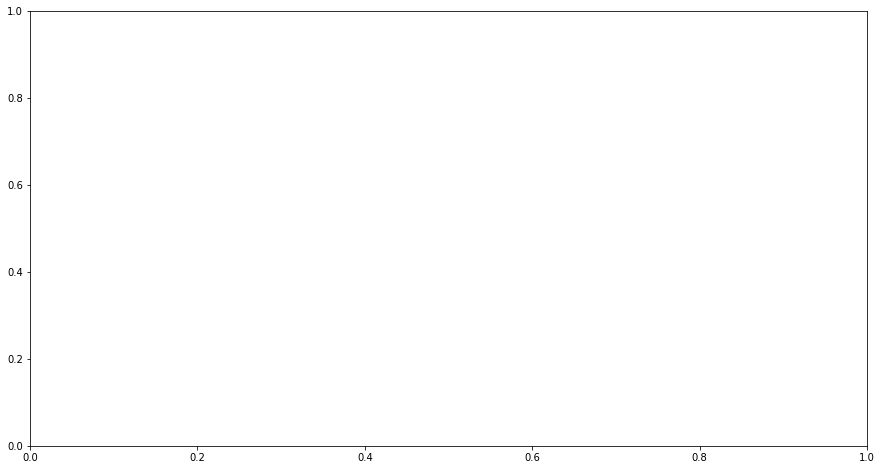

In [ ]:
plt.figure(figsize=(15,8))
sns.kdeplot(smodif.Rating, shade=True)

In [ ]:
s2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 0 to 199999
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   category     200000 non-null  object
 1   description  200000 non-null  object
 2   title        200000 non-null  object
 3   rank         200000 non-null  object
 4   newcat       200000 non-null  object
dtypes: object(5)
memory usage: 9.2+ MB


In [ ]:
smodif = smodif[pd.notnull(smodif.ReviewText)].reset_index(drop=True).copy()

In [ ]:
s2

,category,description,title,rank,newcat
0,[],[It is a biology book with God&apos;s perspect...,Biology Gods Living Creation Third Edition 10 ...,"1,349,781 in Books (",[]
1,"[Books, New, Used & Rental Textbooks, Medicine...",[],Mksap 16 Audio Companion: Medical Knowledge Se...,"1,702,625 in Books (","[New, Used & Rental Textbooks, Medicine & Heal..."
2,"[Books, Arts & Photography, Music]","[Discography of American Punk, Hardcore, and P...","Flex! Discography of North American Punk, Hard...","6,291,012 in Books (","[Arts & Photography, Music]"
3,"[Books, Arts & Photography, Music]",[This is a collection of classic gospel hymns ...,Heavenly Highway Hymns: Shaped-Note Hymnal,"2,384,057 in Books (","[Arts & Photography, Music]"
4,[],[],Georgina Goodman Nelson Womens Size 8.5 Purple...,"11,735,726 in Books (",[]
...,...,...,...,...,...
199995,"[Books, Cookbooks, Food &amp; Wine, Regional &...","[, , , , , ]",Ciao Italia in Tuscany: Traditional Recipes fr...,"1,059,904 in Books (","[Cookbooks, Food &amp; Wine, Regional &amp; In..."
199996,"[Books, Mystery, Thriller &amp; Suspense, Thri...",[The author's death three years ago has not pr...,The Tristan Betrayal,"2,128,098 in Books (","[Mystery, Thriller &amp; Suspense, Thrillers &..."
199997,"[Books, Self-Help, Death &amp; Grief]",[This unflinching and emotionally powerful por...,Your Father's Voice: Letters for Emmy About Li...,"2,273,246 in Books (","[Self-Help, Death &amp; Grief]"
199998,"[Books, New, Used &amp; Rental Textbooks, Huma...",[],The Geography of Warfare,"6,040,748 in Books (","[New, Used &amp; Rental Textbooks, Humanities]"


In [ ]:
smodif["ReviewText"] = smodif["ReviewText"].apply(lambda x: cleanData(x))
smodif["text_length"] = smodif["ReviewText"].apply(lambda x: getSentenceLength(x))

## create negative dummy var
smodif["negative"] = smodif["Rating"].apply(lambda x: 1 if x<3 else 0)

## create numerical categories
smodif["cat1_num"] = smodif['cat1'].astype('category').cat.codes
smodif["cat2_num"] = smodif['cat2'].astype('category').cat.codes

In [ ]:
smodif = smodif[smodif.cat1_num != -1]

In [ ]:
smodif["cat1_num"]

0        13
1        13
2        13
3        13
4        13
         ..
16045    24
16046    24
16047    24
16048    24
16049    24
Name: cat1_num, Length: 16050, dtype: int8

In [ ]:
## remove reviews with length more than 100 and less than 10
smodif = smodif[smodif.text_length<=100].copy()
smodif = smodif[smodif.text_length>=10].copy()
## if length of a review is shorter than 100; fill it in with placeholer words
smodif["text_adj"] = smodif["ReviewText"].apply(lambda x: add_placeholders(x,100))

In [ ]:
from nltk import FreqDist

## create word count dictionary for all reviews
word_dist = FreqDist()
for s in smodif.text_adj:
    word_dist.update(s.split())

## replace rare words (occur only once)
words_to_replace = [k for k, v in word_dist.items() if v == 1]

word_lookup = {}
for word in word_dist.keys():
    if word in words_to_replace:
        word_lookup[word] = "rareword"
    else:
        word_lookup[word] = word

def replace_words(strg, words_to_replace):
    line = strg.split()
    line = [word_lookup[x] for x in line]
    result = ' '.join(line)
    return result

smodif["text_adj"] = smodif["text_adj"].apply(lambda x: replace_words(x, words_to_replace))

In [ ]:
## create word count dictionary for all reviews
word_dist = FreqDist()
for s in smodif.text_adj:
    word_dist.update(s.split())

vocab = {}
for e,y in enumerate(word_dist.keys()):
    vocab[y]=e


In [ ]:
## map each sentence to a vector of words:
smodif["sentence_vecs"] = smodif["text_adj"].apply(lambda x: create_sentence_vectors(x, vocab))

In [ ]:
train, test = train_test_split(smodif, test_size = 0.3, random_state = 0)
test, valid = train_test_split(test, test_size = 0.33, random_state = 0)
full_df = {'train': train, 'test': test, 'valid': valid, 'vocab': vocab}
test

,reviewerID,asin,Title,ReviewText,Summary,Rating,cat1,cat2,text_length,negative,cat1_num,cat2_num,text_adj,sentence_vecs
3076,A1SBS23684LNLS,0002247399,A Dance with Dragons,would ve been an appropriate title i am so dis...,"My name is Reek, it rhymes with weak.",1,Science Fiction & Fantasy,NaN,71,1,24,-1,would ve been an appropriate title i am so dis...,"[233, 147, 202, 172, 3157, 898, 31, 467, 49, 3..."
2999,A1CTIYWQYPBF26,0002247399,A Dance with Dragons,i did not start reading this series until book...,Fantastic,5,Science Fiction & Fantasy,NaN,65,0,24,-1,i did not start reading this series until book...,"[31, 931, 357, 1337, 74, 20, 527, 1424, 5, 256..."
10717,A1X64HF17UU8TX,0007231601,Gospel of the Flying Spaghetti Monster,he has spoken and we must obey this book shoul...,He has spoken,5,Humor & Entertainment,NaN,28,0,12,-1,he has spoken and we must rareword this book s...,"[532, 89, 5756, 1, 166, 24, 44, 20, 5, 3835, 4..."
750,A38L9W5901BLFP,0002219417,The Winds of War,long but worth the time the author provides an...,Winds of War,4,Literature & Fiction,NaN,41,0,13,-1,long but worth the time the author provides an...,"[250, 46, 1040, 34, 71, 34, 343, 54, 172, 44, ..."
6730,A3LI81JUG7EHYG,0007103417,Leadership and the One Minute Manager,i read many leadership books this one was oka...,It's ok,3,Business & Money,NaN,25,0,4,-1,i read many leadership books this one was okay...,"[31, 51, 203, 1674, 26, 20, 22, 483, 1155, 31,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14808,A1KADMPHI3ZRYO,0007423632,Prince of Thorns,one of the darkest main characters i have read...,A great read.,5,Science Fiction & Fantasy,NaN,22,0,24,-1,one of the darkest main characters i have read...,"[22, 29, 34, 3572, 1675, 1456, 31, 25, 51, 31,..."
12805,A3H2B2MO9OFW18,0007303017,Endal: How One Extraordinary Dog Brought a Fam...,i am over through the book and no dog i sym...,When do we hear about the dog?,1,Biographies & Memoirs,NaN,33,1,2,-1,i am over through the book and no dog i sympat...,"[31, 467, 145, 677, 34, 5, 1, 274, 1417, 31, 6..."
10933,A1ZIE58ZSBWVUC,0007236360,Damaged: The Heartbreaking True Story of a For...,wonderful i can t seem to understand why life...,Damaged,5,Parenting & Relationships,NaN,23,0,19,-1,wonderful i can t seem to understand why life ...,"[630, 31, 56, 41, 632, 9, 306, 783, 59, 21, 20..."
4442,A3P3UOHYBFRGJN,0006476155,Along Came a Spider,having missed this one in the cross series i h...,Speed Reading,5,"Mystery, Thriller & Suspense",NaN,75,0,16,-1,having missed this one in the cross series i h...,"[325, 1689, 20, 22, 84, 34, 2878, 527, 31, 25,..."


In [ ]:
smodif.to_pickle("./dummy.pkl")

In [ ]:
b = pd.read_pickle('dummy.pkl')
y=7*5
print(b)
x=y

                  reviewerID  ...                                      sentence_vecs
0      A10000012B7CGYKOMPQ4L  ...  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1, ...
1             A2S166WSCFIFP5  ...  [20, 21, 22, 23, 24, 25, 26, 27, 21, 4, 28, 29...
2             A1BM81XB4QHOA3  ...  [20, 5, 54, 4, 55, 6, 8, 56, 57, 9, 11, 58, 59...
5             A3V1MKC2BVWY48  ...  [74, 20, 75, 23, 76, 77, 78, 4, 79, 80, 29, 81...
6             A12387207U8U24  ...  [106, 8, 51, 107, 85, 108, 109, 110, 1, 111, 1...
...                      ...  ...                                                ...
16044         A3IVWH7BUE5GBZ  ...  [46, 27, 85, 150, 157, 152, 4, 395, 29, 8148, ...
16045         A2V9A4HN0RPTK4  ...  [3682, 8, 25, 9, 33, 1074, 3404, 20, 7779, 166...
16047          AZLA7VI30F7JE  ...  [34, 5, 483, 802, 1, 1066, 1, 31, 552, 34, 268...
16048         A178XM4D2S6XOS  ...  [27, 483, 3182, 46, 357, 1964, 106, 500, 106, ...
16049         A3VAUXO3JPKB5Y  ...  [20, 393, 41, 23, 209, 208, 29

In [ ]:
train, test = train_test_split(smodif, test_size = 0.3, random_state = 0)
test, valid = train_test_split(test, test_size = 0.33, random_state = 0)
full_df = {'train': train, 'test': test, 'valid': valid, 'vocab': vocab}

In [ ]:
#not required
train, test = train_test_split(df_sample, test_size = 0.3, random_state = 0)
test, valid = train_test_split(test, test_size = 0.33, random_state = 0)
sample_df = {'train': train, 'test': test, 'valid': valid, 'vocab': vocab_sample}

NameError: ignored

In [ ]:
result = {'full_df': full_df}


In [ ]:
result

{'full_df': {'test':            reviewerID  ...                                      sentence_vecs
  3076   A1SBS23684LNLS  ...  [233, 147, 202, 172, 3157, 898, 31, 467, 49, 3...
  2999   A1CTIYWQYPBF26  ...  [31, 931, 357, 1337, 74, 20, 527, 1424, 5, 256...
  10717  A1X64HF17UU8TX  ...  [532, 89, 5756, 1, 166, 24, 44, 20, 5, 3835, 4...
  750    A38L9W5901BLFP  ...  [250, 46, 1040, 34, 71, 34, 343, 54, 172, 44, ...
  6730   A3LI81JUG7EHYG  ...  [31, 51, 203, 1674, 26, 20, 22, 483, 1155, 31,...
  ...               ...  ...                                                ...
  14808  A1KADMPHI3ZRYO  ...  [22, 29, 34, 3572, 1675, 1456, 31, 25, 51, 31,...
  12805  A3H2B2MO9OFW18  ...  [31, 467, 145, 677, 34, 5, 1, 274, 1417, 31, 6...
  10933  A1ZIE58ZSBWVUC  ...  [630, 31, 56, 41, 632, 9, 306, 783, 59, 21, 20...
  4442   A3P3UOHYBFRGJN  ...  [325, 1689, 20, 22, 84, 34, 2878, 527, 31, 25,...
  11113   AZ8LWA8572X3T  ...  [22, 29, 34, 98, 26, 31, 147, 232, 51, 27, 13,...
  
  [1750 rows x 14 

In [ ]:
with open('./dummy.pkl', 'wb') as data:
    pickle.dump(result, data)

In [ ]:
from sklearn.metrics import confusion_matrix

def accuracy(predictions, labels):
    return ((100.0 * np.sum(np.argmax(predictions, 1) == labels) / predictions.shape[0])+x)

In [ ]:
with open('./dummy.pkl', 'rb') as data:
    data_dic = pickle.load(data)

In [ ]:
train = data_dic['full_df']['train']
test  = data_dic['full_df']['test']
valid = data_dic['full_df']['valid']

KeyError: ignored

In [ ]:
train_dataset = np.array(train.sentence_vecs.tolist())
test_dataset  = np.array(test.sentence_vecs.tolist())
valid_dataset = np.array(valid.sentence_vecs.tolist())

In [ ]:
smodif

,reviewerID,asin,Title,ReviewText,Summary,Rating,cat1,cat2,text_length,negative,cat1_num,cat2_num,text_adj,sentence_vecs
0,A10000012B7CGYKOMPQ4L,000100039X,The Prophet,spiritually and mentally inspiring a book that...,Wonderful!,5,Literature & Fiction,NaN,22,0,13,-1,spiritually and mentally inspiring a book that...,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1, ..."
1,A2S166WSCFIFP5,000100039X,The Prophet,this is one my must have books it is a masterp...,close to god,5,Literature & Fiction,NaN,51,0,13,-1,this is one my must have books it is a masterp...,"[20, 21, 22, 23, 24, 25, 26, 27, 21, 4, 28, 29..."
2,A1BM81XB4QHOA3,000100039X,The Prophet,this book provides a reflection that you can a...,Must Read for Life Afficianados,5,Literature & Fiction,NaN,41,0,13,-1,this book provides a reflection that you can a...,"[20, 5, 54, 4, 55, 6, 8, 56, 57, 9, 11, 58, 59..."
5,A3V1MKC2BVWY48,000100039X,The Prophet,reading this made my mind feel like a still po...,This book will bring you peace,5,Literature & Fiction,NaN,60,0,13,-1,reading this made my mind feel like a still po...,"[74, 20, 75, 23, 76, 77, 78, 4, 79, 80, 29, 81..."
6,A12387207U8U24,000100039X,The Prophet,as you read gibran s poetry brings spiritual a...,Graet Work,5,Literature & Fiction,NaN,40,0,13,-1,as you read gibran s poetry brings spiritual a...,"[106, 8, 51, 107, 85, 108, 109, 110, 1, 111, 1..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16044,A3IVWH7BUE5GBZ,0007444117,Allegiant,but it s more real than a lot of ya stories ...,You May Not Like the Ending...,4,Science Fiction & Fantasy,NaN,65,0,24,-1,but it s more real than a lot of ya stories ou...,"[46, 27, 85, 150, 157, 152, 4, 395, 29, 8148, ..."
16045,A2V9A4HN0RPTK4,0007444117,Allegiant,spoiler you have to be kidding ser...,Another author trying to prove a point being d...,1,Science Fiction & Fantasy,NaN,91,1,24,-1,spoiler you have to be kidding seriously this ...,"[3682, 8, 25, 9, 33, 1074, 3404, 20, 7779, 166..."
16047,AZLA7VI30F7JE,0007444117,Allegiant,the book was slow and monotonous and i found t...,Save time and frustation and stop after the fi...,2,Science Fiction & Fantasy,NaN,54,1,24,-1,the book was slow and monotonous and i found t...,"[34, 5, 483, 802, 1, 1066, 1, 31, 552, 34, 268..."
16048,A178XM4D2S6XOS,0007444117,Allegiant,it was ok but not nearly as good as the others...,Not that great,3,Science Fiction & Fantasy,NaN,52,0,24,-1,it was ok but not nearly as good as the others...,"[27, 483, 3182, 46, 357, 1964, 106, 500, 106, ..."


In [ ]:
train_labels = np.array(train.cat1_num.tolist())
test_labels  = np.array(test.cat1_num.tolist())
valid_labels = np.array(valid.cat1_num.tolist())

In [ ]:
vocab_len = len(data_dic['full_df']['vocab'])

In [ ]:
max_val = smodif["cat1_num"]
max_ValofCat=max_val.max()
print(max_ValofCat)

29


## Ready for tensorflow!

In [ ]:

#tf.keras.initializers.GlorotNormal
SEQ_LENGTH = 100
BATCH_SIZE = 50
NUM_LABELS = 54

VOCAB_SIZE = vocab_len
EMBED_SIZE = 128

FILTER_SIZE_1 = 3
FILTER_SIZE_2 = 4
FILTER_SIZE_3 = 5
NUM_FILTERS = 128

keep_prob = 0.8
l2_reg_lambda=0.0


tf_train_dataset = tf.placeholder(tf.int32, shape=(BATCH_SIZE, SEQ_LENGTH), name="input_x")
tf_train_labels = tf.placeholder(tf.int32, shape=(BATCH_SIZE), name="input_y")
tf_valid_dataset = tf.constant(valid_dataset) 
tf_test_dataset = tf.constant(test_dataset)

# Keeping track of l2 regularization loss (optional)
l2_loss = tf.constant(0.0)

## Embedding layer

embed_weigths = tf.Variable(tf.random_uniform([VOCAB_SIZE, EMBED_SIZE], -1.0, 1.0))
    
## Convolutional layers
## Change to True if run again
with tf.variable_scope("vars4", reuse = None):
    
    conv1_weights = tf.get_variable("conv1_w4", shape=[FILTER_SIZE_1, EMBED_SIZE, 1, NUM_FILTERS],\
                                                    initializer=tf.contrib.layers.xavier_initializer_conv2d())
    conv1_biases = tf.Variable(tf.constant(0.1, shape=[NUM_FILTERS]), name = "conv1_b4")

    conv2_weights = tf.get_variable("conv2_w4", shape=[FILTER_SIZE_2, EMBED_SIZE, 1, NUM_FILTERS],\
                                                    initializer=tf.contrib.layers.xavier_initializer_conv2d())
    conv2_biases = tf.Variable(tf.constant(0.1, shape=[NUM_FILTERS]), name = "conv2_b4")

    conv3_weights = tf.get_variable("conv3_w4", shape=[FILTER_SIZE_3, EMBED_SIZE, 1, NUM_FILTERS],\
                                                    initializer=tf.contrib.layers.xavier_initializer_conv2d())
    conv3_biases = tf.Variable(tf.constant(0.1, shape=[NUM_FILTERS]), name = "conv3_b4")

## Fully connected layer

    fc1_weights = tf.get_variable("fc1_w4", shape=[3*NUM_FILTERS, NUM_LABELS],\
                                                initializer=tf.contrib.layers.xavier_initializer())
    fc1_biases = tf.Variable(tf.constant(0.1, shape=[NUM_LABELS]), name = "fc1_b4")

# Model:
def model(data, keep_prob = keep_prob): 
    
    with tf.device('/cpu:0'), tf.name_scope("word2vec_embedding"):    
        embed_chars = tf.nn.embedding_lookup(embed_weigths, data)
        embed_chars = tf.expand_dims(embed_chars, -1)
    
    with tf.name_scope("conv1-maxpool-3"):
        conv1 = tf.nn.conv2d(embed_chars, conv1_weights, strides=[1, 1, 1, 1], padding="VALID")
        relu1 = tf.nn.relu(tf.nn.bias_add(conv1, conv1_biases))
        pool1 = tf.nn.max_pool(relu1, ksize=[1, SEQ_LENGTH-FILTER_SIZE_1+1, 1, 1],
                               strides=[1, 1, 1, 1], padding='VALID')
    with tf.name_scope("conv2-maxpool-4"):
        conv2 = tf.nn.conv2d(embed_chars, conv2_weights, strides=[1, 1, 1, 1], padding="VALID")
        relu2 = tf.nn.relu(tf.nn.bias_add(conv2, conv2_biases))
        pool2 = tf.nn.max_pool(relu2, ksize=[1, SEQ_LENGTH-FILTER_SIZE_2+1, 1, 1],
                               strides=[1, 1, 1, 1], padding='VALID')
    
    with tf.name_scope("conv3-maxpool-5"):
        conv3 = tf.nn.conv2d(embed_chars, conv3_weights, strides=[1, 1, 1, 1], padding="VALID")
        relu3 = tf.nn.relu(tf.nn.bias_add(conv3, conv3_biases))
        pool3 = tf.nn.max_pool(relu3, ksize=[1, SEQ_LENGTH-FILTER_SIZE_3+1, 1, 1],
                               strides=[1, 1, 1, 1], padding='VALID')
    
    with tf.name_scope("combine_flatten"):
        pooled_outputs = [pool1, pool2, pool3]
        h_pool = tf.concat(pooled_outputs,3)
        h_pool_flat = tf.reshape(h_pool, [-1, NUM_FILTERS*3])
    
    with tf.name_scope("dropout"):
        h_pool_flat = tf.nn.dropout(h_pool_flat, keep_prob)
    
    ## Fully connected layer
    with tf.name_scope("output"):
        return tf.matmul(h_pool_flat, fc1_weights) + fc1_biases  
  
#Training computation:
logits = model(tf_train_dataset)
with tf.name_scope("loss"):
    l2_loss += tf.nn.l2_loss(fc1_weights)
    l2_loss += tf.nn.l2_loss(fc1_biases)
    loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=tf_train_labels)) 
    + l2_reg_lambda * l2_loss
  
# Optimizer:
optimizer = tf.train.GradientDescentOptimizer(0.01).minimize(loss)

#saver = tf.train.Saver()

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


**Predictions for the training, validation, and test data**

In [ ]:
train_prediction = tf.nn.softmax(logits)
valid_prediction = tf.nn.softmax(model(tf_valid_dataset))
test_prediction = tf.nn.softmax(model(tf_test_dataset))

In [ ]:
NUM_ITERATIONS = 1001

step = []
pred = []
loss_minibatch = []
accuracy_minibatch = []
accuracy_valid = []

logs_path = 'E:\\Newfolder\\tflogs'

with tf.Session() as session:
    tf.global_variables_initializer().run()
    
    # op to write logs to Tensorboard
    summary_writer = tf.summary.FileWriter(logs_path, graph=tf.get_default_graph())
    
    for i in range(NUM_ITERATIONS):
        offset = (i * BATCH_SIZE) % (train_labels.shape[0] - BATCH_SIZE)
        batch_data = train_dataset[offset:(offset + BATCH_SIZE), :]
        batch_labels = train_labels[offset:(offset + BATCH_SIZE)]
        feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels}
        _, l, predictions = session.run([optimizer, loss, train_prediction], feed_dict=feed_dict) 
        
        if (i % 100 == 0): ## info will be printed every 1000th time
            step.append(i)
            print("Minibatch loss at step %d: %f" % (i, l))
            loss_minibatch.append(l)
            print("Minibatch accuracy: %.1f%%" % accuracy(predictions, batch_labels))
            accuracy_minibatch.append(accuracy(predictions, batch_labels))
            print('Validation accuracy: %.1f%%' % accuracy(valid_prediction.eval(), valid_labels))    
            accuracy_valid.append(accuracy(valid_prediction.eval(), valid_labels))
           
    print("\nTest accuracy: %.1f%%" % accuracy(test_prediction.eval(), test_labels))
    
    #save_path = saver.save(session, "../models/cat1_cnn.ckpt")
    #print("Model saved in file: %s" % save_path)
    
    pred.append(np.argmax(test_prediction.eval(), 1))
    
    print("Run the command line:\n" \
          "--> tensorboard --logdir=/tmp/tensorflow_logs " \
          "\nThen open http://172.26.179.29:6006/ into your web browser")

pred = pred[0]

Minibatch loss at step 0: 3.968955
Minibatch accuracy: 49.0%
Validation accuracy: 51.5%
Minibatch loss at step 100: 2.068727
Minibatch accuracy: 71.0%
Validation accuracy: 70.8%
Minibatch loss at step 200: 2.290333
Minibatch accuracy: 73.0%
Validation accuracy: 76.0%
Minibatch loss at step 300: 1.907344
Minibatch accuracy: 73.0%
Validation accuracy: 76.6%
Minibatch loss at step 400: 1.577193
Minibatch accuracy: 91.0%
Validation accuracy: 77.9%
Minibatch loss at step 500: 1.818642
Minibatch accuracy: 81.0%
Validation accuracy: 76.8%
Minibatch loss at step 600: 1.627449
Minibatch accuracy: 97.0%
Validation accuracy: 78.3%
Minibatch loss at step 700: 1.840833
Minibatch accuracy: 79.0%
Validation accuracy: 80.1%
Minibatch loss at step 800: 1.750573
Minibatch accuracy: 91.0%
Validation accuracy: 80.9%
Minibatch loss at step 900: 2.006339
Minibatch accuracy: 77.0%
Validation accuracy: 81.9%
Minibatch loss at step 1000: 1.736258
Minibatch accuracy: 85.0%
Validation accuracy: 83.0%

Test accur

In [ ]:
train[["cat1_num","cat1"]].drop_duplicates().sort_values(by="cat1_num")

,cat1_num,cat1
6778,0,Arts & Photography
3641,1,Arts &amp; Photography
12302,2,Biographies & Memoirs
3551,3,Biographies &amp; Memoirs
5644,4,Business & Money
13894,5,Children's Books
4045,6,Christian Books & Bibles
5786,7,Computers & Technology
647,8,"Cookbooks, Food & Wine"
4878,9,"Crafts, Hobbies & Home"


In [ ]:
test_labels.shape

(1750,)

Text(0.5, 1.0, 'Accuracy training vs vailadation set per number of iterations')

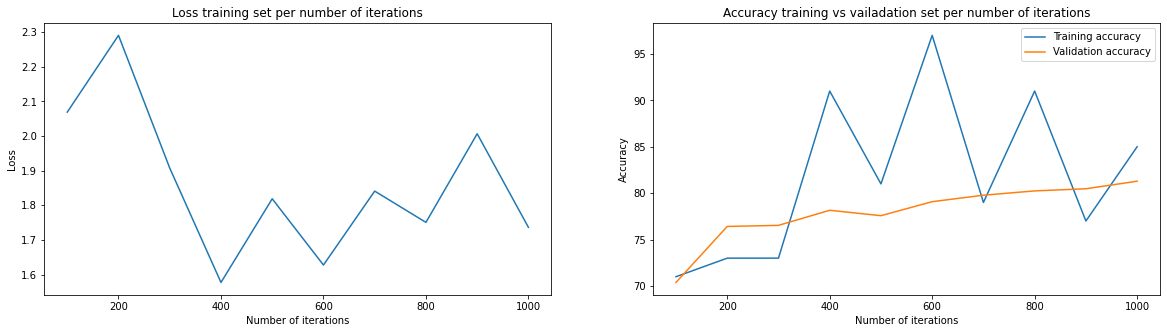

In [ ]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.plot(step[1:len(step)],loss_minibatch[1:len(step)])
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss training set per number of iterations')

plt.subplot(1, 2, 2)
plt.plot(step[1:len(step)],accuracy_minibatch[1:len(step)], label = 'Training accuracy')
plt.plot(step[1:len(step)],accuracy_valid[1:len(step)], label = 'Validation accuracy')
plt.legend(loc = 0)
plt.xlabel('Number of iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy training vs vailadation set per number of iterations')